In [1]:
library(TSA)
library(mgcv)
install.packages("aod")
library("aod")
library("MASS")
library(vars)
install.packages("tseries")
library(tseries)
install.packages("forecast")
library(forecast)


Attaching package: 'TSA'

The following objects are masked from 'package:stats':

    acf, arima

The following object is masked from 'package:utils':

    tar

Loading required package: nlme
This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.
Installing package into 'C:/Users/bbalamdari/OneDrive - Ecolab/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'aod' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bbalamdari\AppData\Local\Temp\Rtmpkfpxo7\downloaded_packages


Warning message:
"package 'aod' was built under R version 3.6.3"
Attaching package: 'aod'

The following object is masked from 'package:mgcv':

    negbin

Loading required package: strucchange
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: urca
Loading required package: lmtest
Installing package into 'C:/Users/bbalamdari/OneDrive - Ecolab/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'tseries' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bbalamdari\AppData\Local\Temp\Rtmpkfpxo7\downloaded_packages


Warning message:
"package 'tseries' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Installing package into 'C:/Users/bbalamdari/OneDrive - Ecolab/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bbalamdari\AppData\Local\Temp\Rtmpkfpxo7\downloaded_packages


Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 

Attaching package: 'forecast'

The following object is masked from 'package:nlme':

    getResponse



In [3]:
temp = read.csv("Temperature.csv",header=T)

river = read.csv("RiverFlow.csv",header=F)

rain  = read.csv("Precipitation .csv")

head(temp, n=5)
head(river, n=5)
head(rain, n=5)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1950,55.4,50.8,50.2,58.8,72.8,77.5,77.5,76.2,71.4,65.9,47.6,40.6
2,1951,45.3,47.5,53.0,60.0,70.1,77.5,79.1,80.9,73.8,65.1,47.5,47.1
3,1952,49.3,48.4,51.5,61.6,71.9,82.3,82.0,78.2,71.5,58.9,52.8,43.6
4,1953,47.0,47.4,54.6,59.5,73.3,78.2,78.7,78.9,72.2,64,52.7,43.8
5,1954,45.1,50.1,53.0,65.5,64.2,78.0,82.1,82.5,77.8,64.5,49.5,43.7


,V1,V2,V3
,<int>,<int>,<dbl>
1,1956,1,706.2
2,1956,2,626.8
3,1956,3,619.0
4,1956,4,1421.0
5,1956,5,1808.0


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
1,1950,2.06,3.02,4.01,1.45,3.73,4.08,7.39,5.51,3.61,2.57,0.81,2.94
2,1951,2.25,3.78,4.60,4.88,0.47,4.86,7.41,1.17,5.58,2.78,2.63,8.36
3,1952,3.46,4.49,8.61,1.92,3.94,3.11,1.20,7.05,1.61,0.75,2.12,5.93
4,1953,5.39,5.95,3.41,6.86,3.58,2.09,4.38,1.67,7.32,0.09,1.35,8.25
5,1954,3.73,2.70,3.07,1.91,3.31,2.08,6.31,1.14,0.26,0.17,4.12,3.00


In [4]:
#Fill in missing value in rain for October, 1964
#using the average between September and November
rain[,11]=as.numeric(rain[,11])
rain[14,11]=0.5*(as.numeric(rain[14,10])+as.numeric(rain[14,12]))
rain[,11]=as.factor(rain[,11])

In [5]:
## All variables for the same time period
temp = as.vector(t(temp[,-1]))
temp = temp[-c(1:(12*6))]
temp = temp[-c(736:744)]
rain = as.vector(t(rain[,-1]))
rain = rain[-c(1:(12*6))]
rain = rain[-c(736:744)]
river = as.vector(river[,3])

In [6]:
temp.ts = ts(as.numeric(temp),start=1956, freq=12)
rain.ts = ts(as.numeric(rain),start=1956, freq=12)
river.ts = ts(as.numeric(river),start=1956, freq=12)

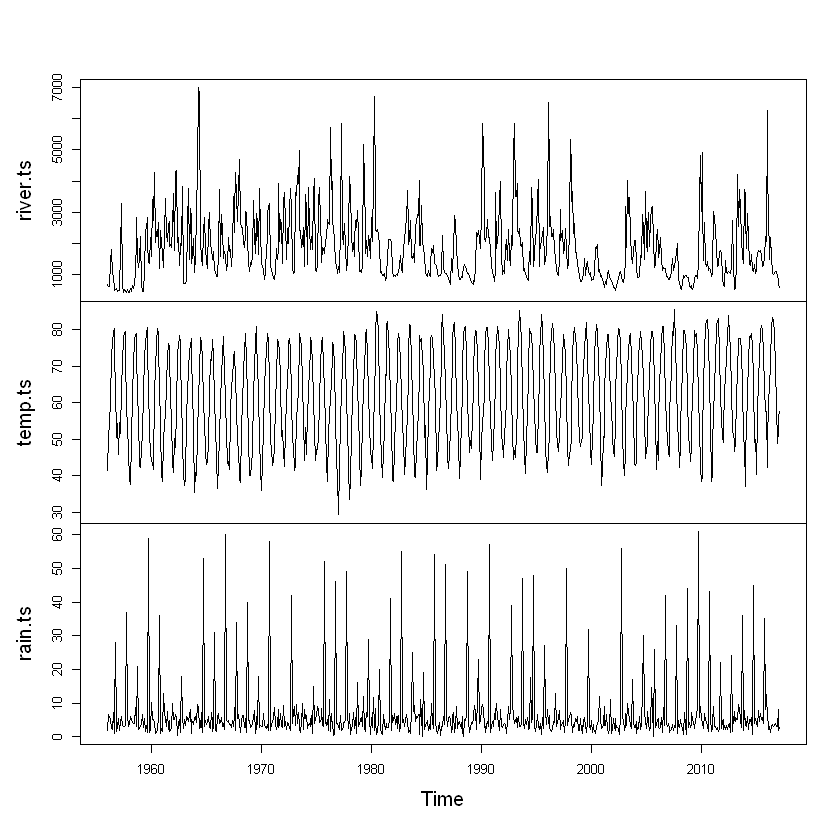

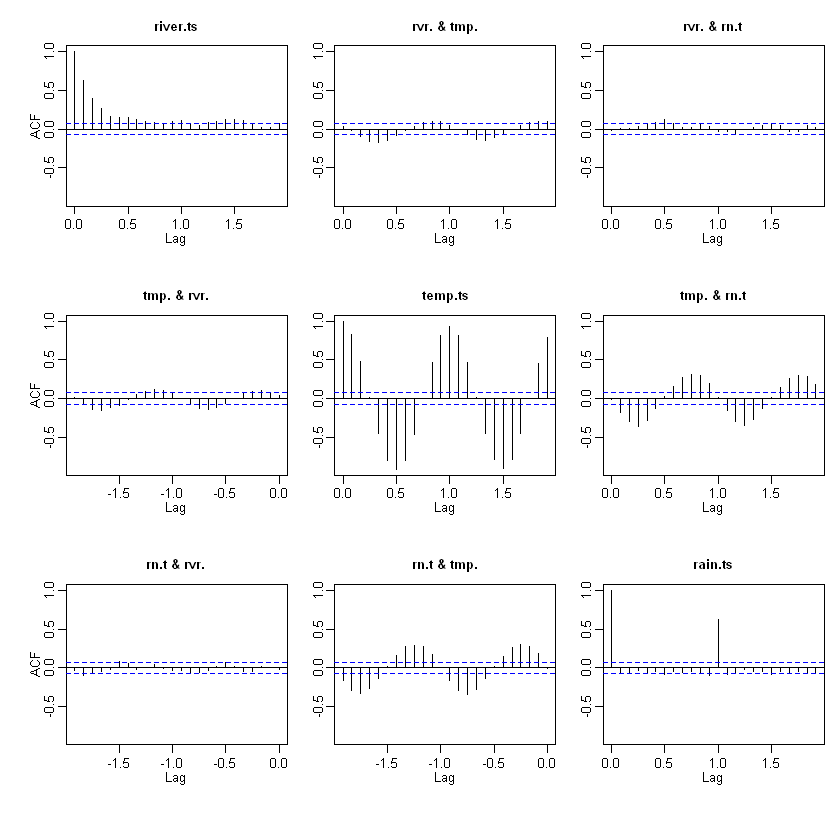

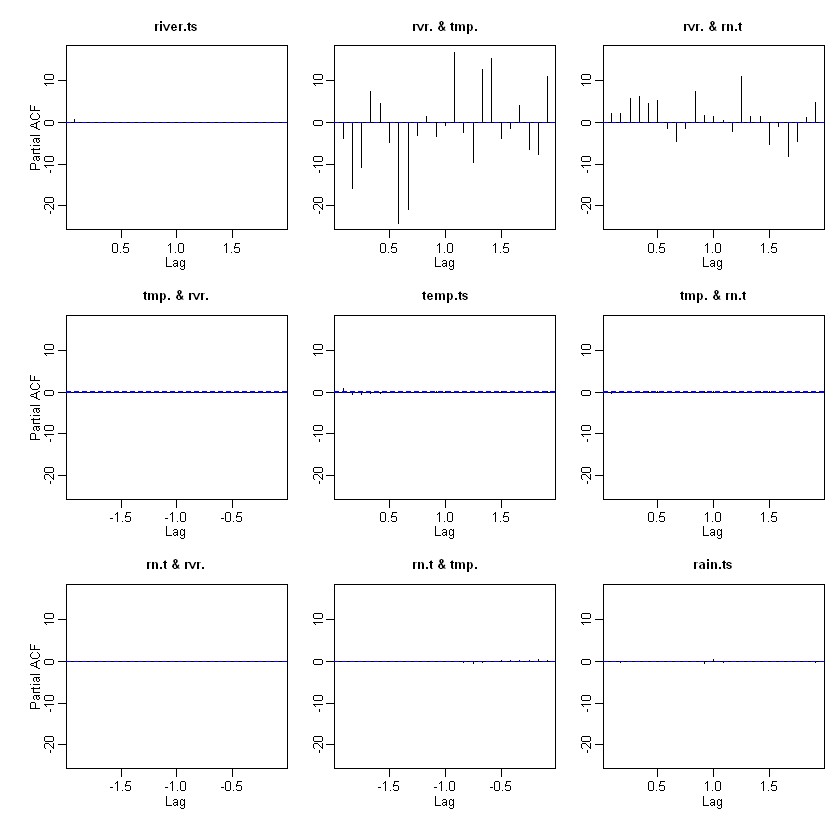

In [7]:
data.ts = ts.union(river.ts,temp.ts,rain.ts)
par(mfrow=c(2,2))
plot(data.ts, type="l",main="")
stats::acf(data.ts, mar=c(5,3,1.9,0))  
stats::pacf(data.ts, mar=c(3.5,3,1.9,0))


In [8]:

adf.test(river.ts, alternative = "stationary")
adf.test(rain.ts, alternative = "stationary")
adf.test(temp.ts, alternative = "stationary")



Warning message in adf.test(river.ts, alternative = "stationary"):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  river.ts
Dickey-Fuller = -6.9666, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(rain.ts, alternative = "stationary"):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  rain.ts
Dickey-Fuller = -13.634, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(temp.ts, alternative = "stationary"):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  temp.ts
Dickey-Fuller = -8.7844, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


In [9]:

#Determine differencing order to achieve stationarity 
ndiffs(river.ts, alpha = 0.05, test = c("adf"))
ndiffs(rain.ts, alpha = 0.05, test = c("adf"))
ndiffs(temp.ts, alpha = 0.05, test = c("adf"))


[1] 0

[1] 0

[1] 0

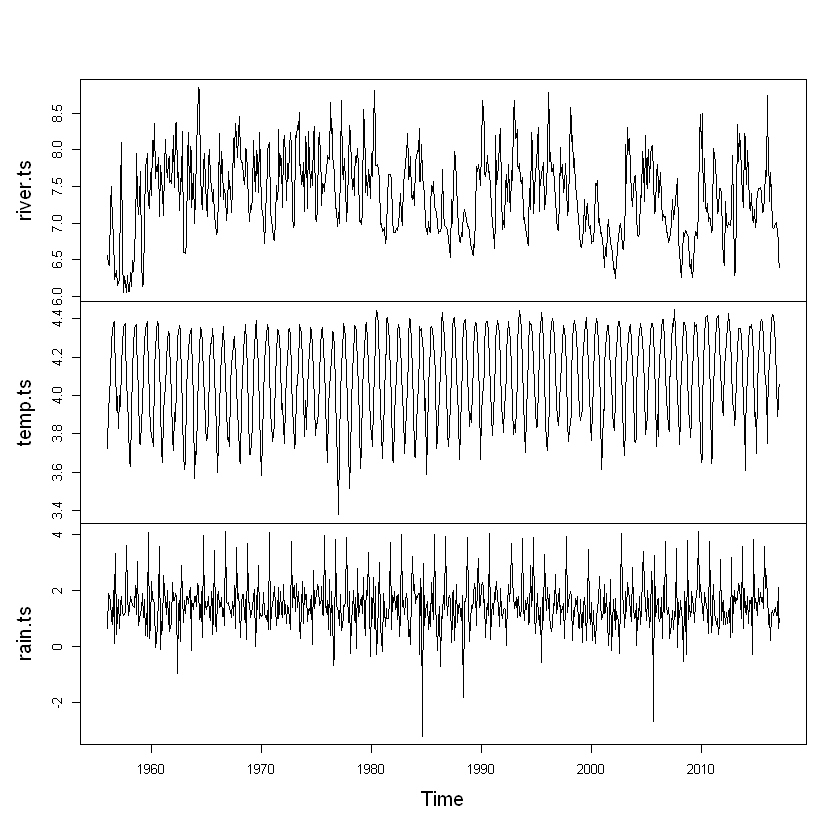

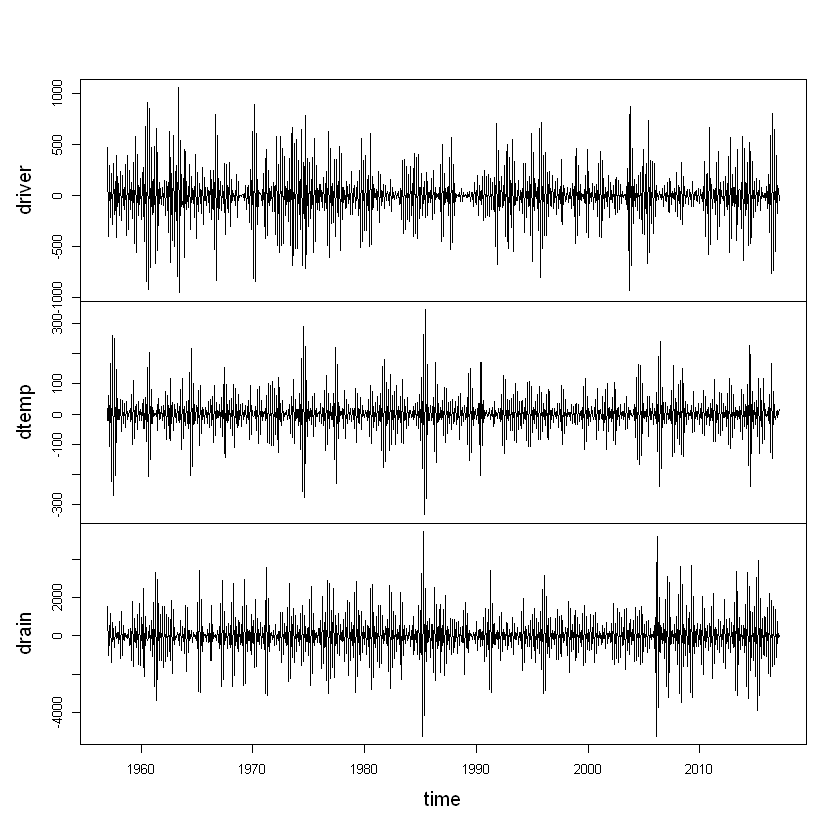

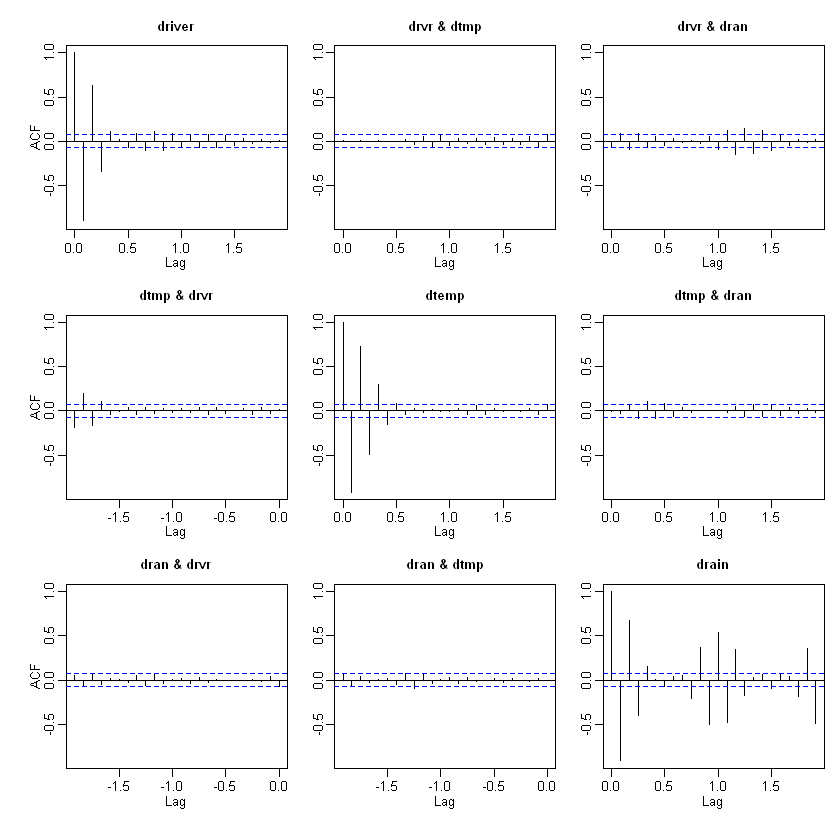

In [10]:
#Log transformation
plot(log(data.ts), type="l",main="")

#Using seasonal differencing of 12 months and log transformation
dtemp=diff(log(temp.ts),differences = 12)
drain=diff(log(rain.ts),differences = 12)
driver=diff(log(river.ts),differences = 12)
ddata.ts = ts.union(driver,dtemp,drain)

par(mfrow=c(2,2))
plot(ddata.ts,xlab="time",main="",type="l")
stats::acf(ddata.ts, mar=c(3.5,3,1.9,0))
#pacf(ddata.ts, mar=c(3.5,3,1.9,0))


In [13]:
#### Data preparation for models: Testing Vs Training ###################
data=data.ts
n = nrow(data)
## Training data: 1956 to 2015
data.train=data[1:(n-15),]
## Test data: 2016 and 3 months in 2017
data.test=data[(n-14):n,]



In [14]:
ts_river=ts(log(data.train[,"river.ts"]),start=1956, freq=12)
ts_rain=ts(log(data.train[,"rain.ts"]),start=1956, freq=12)
ts_temp=ts(log(data.train[,"temp.ts"]),start=1956, freq=12)


ts_river2=ts(log(data.test[,"river.ts"]),start=2016, freq=12)
ts_rain2=ts(log(data.test[,"rain.ts"]),start=2016, freq=12)
ts_temp2=ts(log(data.test[,"temp.ts"]),start=2016, freq=12)


In [15]:
head(data.train,n=5)

river.ts,temp.ts,rain.ts
706.2,41.5,1.88
626.8,51.1,6.57
619.0,53.9,5.93
1421.0,61.0,5.18
1808.0,72.4,2.60


In [16]:
#### Univariate ARIMA model

final.aic = Inf
final.order = c(0,0,0,0)
for (p in 1:6) for (d in 0:1) for (q in 1:6) for(s in 0:2){
   current.aic = AIC(arima(ts_river, order=c(p, d, q), seasonal = list(order=c(0,s,0),
   period=12), method="ML"))
   if (current.aic < final.aic) {
     final.aic = current.aic
     final.order = c(p, d, q,s)
     
   }
 }

# [1] 1 0 4 2 
 

Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in log(s2):
"NaNs produced"Warning message in

In [17]:
final.order

[1] 1 0 4 0


	Box-Pierce test

data:  model.arima$resid
X-squared = 0.59603, df = 1, p-value = 0.4401



	Box-Ljung test

data:  model.arima$resid
X-squared = 0.60167, df = 1, p-value = 0.4379


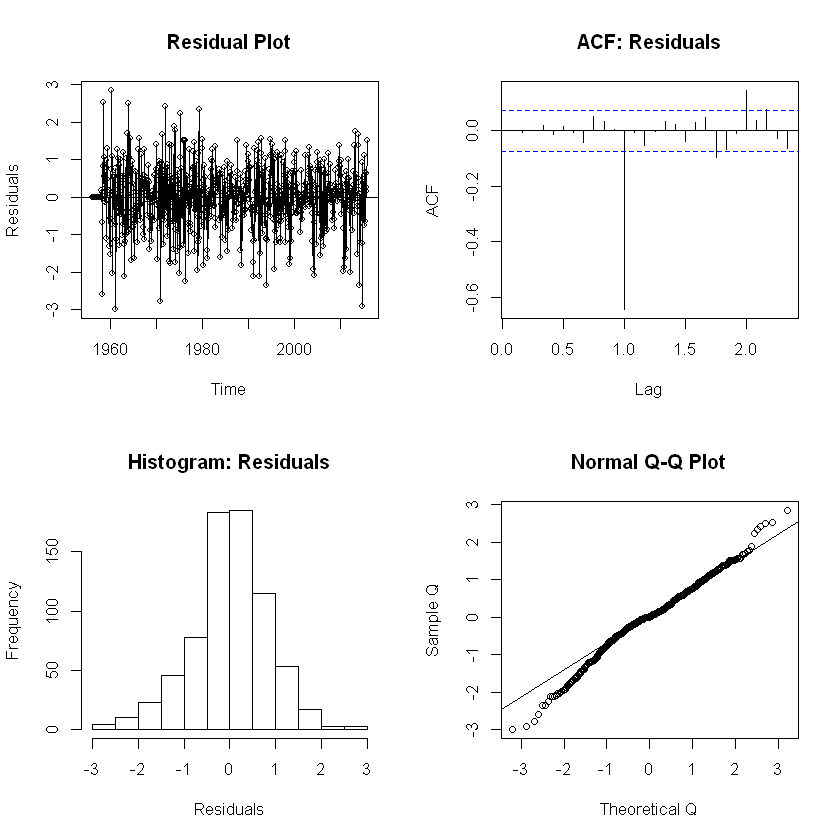

In [18]:
model.arima = stats::arima(ts_river, order=c(1,0,4),seasonal = list(order=c(0,2,0),
   period=12), method="ML") 

## Residual analysis
par(mfrow=c(2,2))
plot(resid(model.arima), ylab='Residuals',type='o',main="Residual Plot")
abline(h=0)
acf(resid(model.arima),main="ACF: Residuals")
hist(resid(model.arima),xlab='Residuals',main='Histogram: Residuals')
qqnorm(resid(model.arima),ylab="Sample Q",xlab="Theoretical Q")
qqline(resid(model.arima))

Box.test(model.arima$resid, lag = (1+4+1), type = "Box-Pierce", fitdf = (1+4))
Box.test(model.arima$resid, lag = (1+4+1), type = "Ljung-Box", fitdf = (1+4))

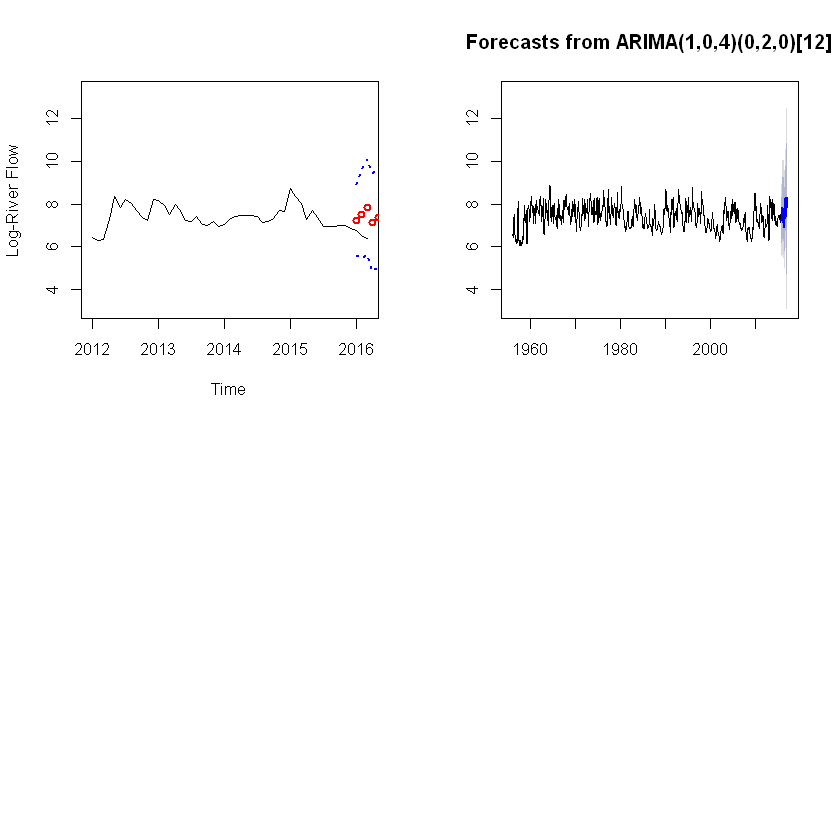

In [21]:
#plot(forecast(model.arima,h=15))

fore = forecast(model.arima,h=15)
fore=as.data.frame(fore)
point.fore = ts(fore[,1],start=2016, freq=12)
lo.fore = ts(fore[,4],start=2016, freq=12)
up.fore = ts(fore[,5],start=2016, freq=12)
ymin=min(c(log(river[(n-50):n]),lo.fore))
ymax=max(c(log(river)[(n-50):n],up.fore))

par(mfrow=c(2,2))
plot(ts(log(as.numeric(river[(n-50):n])),start=2012, freq=12), ylim=c(ymin,ymax), ylab="Log-River Flow", type="l",main="")
points(point.fore,lwd=2,col="red")
lines(lo.fore,lty=3,lwd= 2, col="blue")
lines(up.fore,lty=3,lwd= 2, col="blue")
plot(forecast(model.arima,h=15))

In [22]:
fore

,Point Forecast,Lo 80,Hi 80,Lo 95,Hi 95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Jan 2016,7.239303,6.151640,8.326966,5.575866,8.902739
Feb 2016,7.523018,6.180548,8.865488,5.469888,9.576148
Mar 2016,7.854018,6.398402,9.309633,5.627845,10.080190
Apr 2016,7.143800,5.640603,8.646998,4.844858,9.442742
May 2016,7.360291,5.853198,8.867384,5.055391,9.665191
Jun 2016,7.787819,6.279615,9.296024,5.481219,10.094420
Jul 2016,7.683566,6.175044,9.192089,5.376480,9.990653
Aug 2016,6.894158,5.385544,8.402771,4.586932,9.201383
Sep 2016,7.274399,5.765760,8.783039,4.967135,9.581664


In [23]:
ts_rain

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1956,0.63127178,1.88251383,1.78002421,1.64480506,0.95551145,0.79299252,1.98237983,0.09531018,1.82293509,3.33220451,0.43825493,1.13783300
1957,1.67709656,0.64710324,1.54543258,1.79840401,1.22377543,1.11841492,1.15057203,1.25846099,1.66770682,3.61091791,1.90210753,1.11514159
1958,1.35583515,1.77664583,1.64673370,1.50407740,1.41342303,1.40854497,2.18041746,1.26976054,1.14422280,3.04452244,0.76080583,0.94778940
1959,1.21787571,1.28370777,1.88858365,1.04027671,1.67709656,0.40546511,1.18478998,0.35065687,1.24126859,4.07753744,0.30010459,0.83724752
1960,2.31845844,1.66203036,1.66013103,1.52388002,-0.04082199,0.23111172,0.81093022,1.72276660,1.57691472,3.58351894,-0.11653382,0.90016135
1961,0.55388511,2.54709867,1.99197552,1.61143592,1.15688120,1.99877364,0.78390154,1.59736533,0.51879379,0.69314718,0.87129337,2.29455292
1962,1.65632150,1.62727783,1.90508815,1.78507048,-0.96758403,1.47932923,1.65822808,0.19062036,1.25561604,2.89037176,1.82293509,0.85015093
1963,1.62924054,1.17557333,1.77833645,1.76644166,1.53901545,1.89911799,2.09433015,-0.12783337,1.64673370,1.50407740,1.33762919,1.76814960
1964,1.79342475,1.42791604,2.25234388,2.16102153,0.95165788,1.05779029,1.96571278,1.41098697,0.32208350,3.97029191,1.13462273,1.59533899
1965,1.31908561,1.46093790,1.78170913,1.13140211,0.92028275,1.96711236,1.52388002,0.42526774,1.10525683,3.43398720,0.84156719,0.53062825


In [24]:
##### ARIMAX model
final.aic = Inf
final.order = c(0,0,0,0)
for (p in 1:6) for (d in 0:1) for (q in 1:6) for(s in 0:1){
   current.aic = AIC(arimax(ts_river, order=c(p, d, q), seasonal = list(order=c(0,s,0),
   period=12), method="ML",xreg=data.frame(ts_rain,ts_temp)))
   if (current.aic < final.aic) {
     final.aic = current.aic
     final.order = c(p, d, q,s)
     
   }
 }
# > final.order
# [1] 1 0 4 0 

Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave cod

In [25]:
final.order

[1] 5 0 4 0


	Box-Pierce test

data:  model.arima2$resid
X-squared = 0.52726, df = 1, p-value = 0.4678



	Box-Ljung test

data:  model.arima2$resid
X-squared = 0.53264, df = 1, p-value = 0.4655


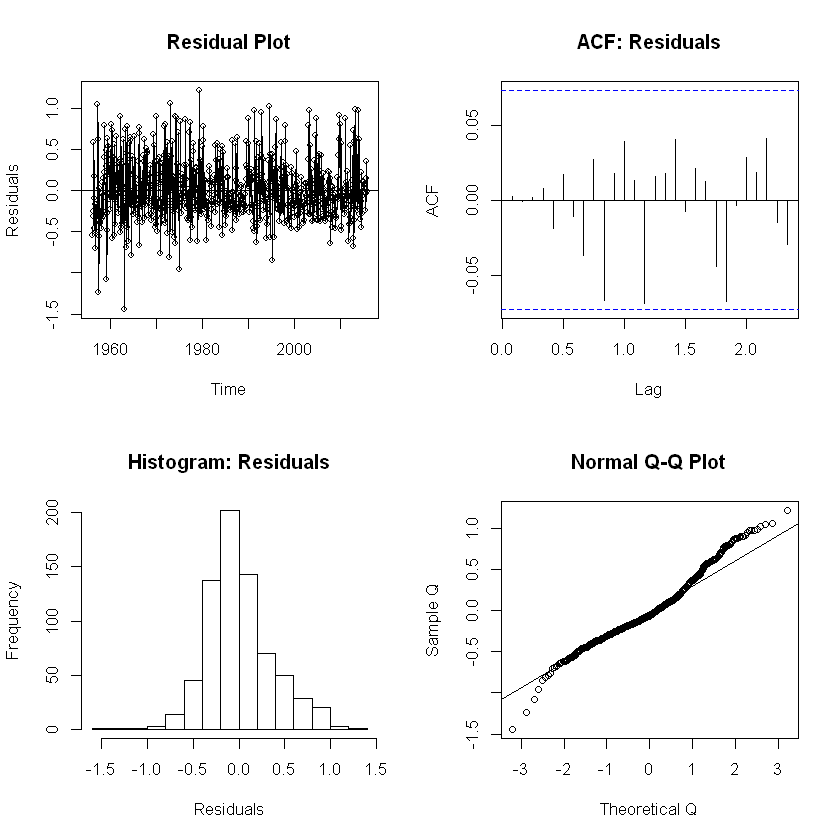

In [26]:
model.arima2 = Arima(ts_river, order = c(1,0,4), method="ML",xreg=data.matrix(ts_rain,ts_temp))
## Residual analysis
par(mfrow=c(2,2))
plot(resid(model.arima2), ylab='Residuals',type='o',main="Residual Plot")
abline(h=0)
acf(resid(model.arima2),main="ACF: Residuals")
hist(resid(model.arima2),xlab='Residuals',main='Histogram: Residuals')
qqnorm(resid(model.arima2),ylab="Sample Q",xlab="Theoretical Q")
qqline(resid(model.arima2))

Box.test(model.arima2$resid, lag = (1+4+1), type = "Box-Pierce", fitdf = (1+4))
Box.test(model.arima2$resid, lag = (1+4+1), type = "Ljung-Box", fitdf = (1+4))

In [27]:
data.frame(ts_rain2,ts_temp2)

ts_rain2,ts_temp2
<ts>,<ts>
1.6370531,3.747148
2.0001277,3.881564
0.7929925,4.102643
1.1474025,4.160444
0.2231436,4.264087
1.1817272,4.394449
1.2974631,4.423648
1.1184149,4.415220
1.2325603,4.366913


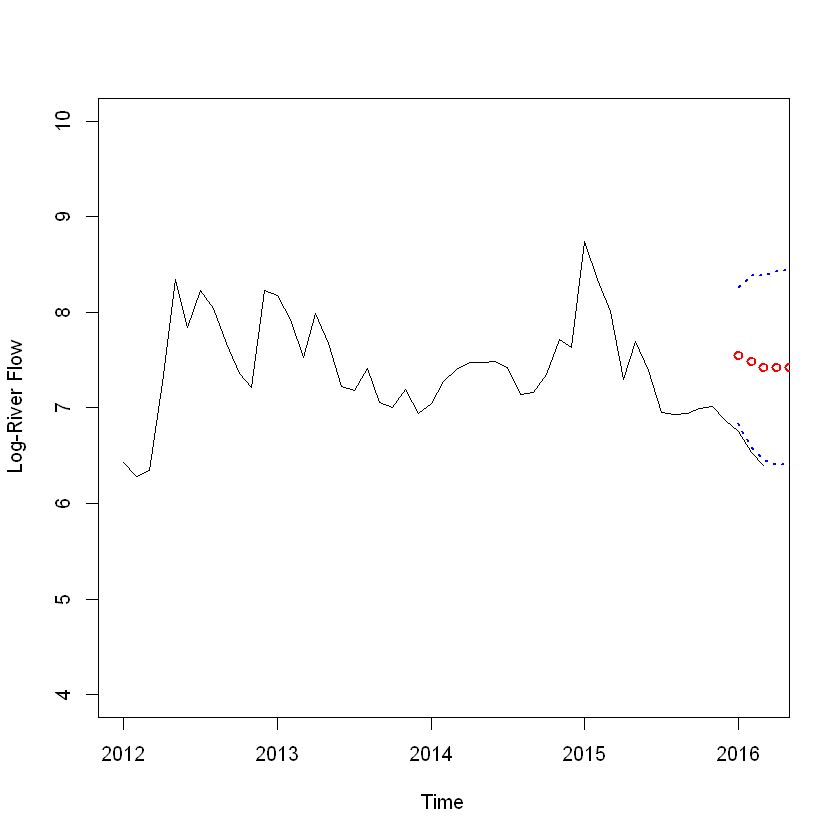

In [28]:
#Predictions versus actual
plot(ts(log(as.numeric(river[(n-50):n])),start=2012, freq=12), ylim=c(4,10), ylab="Log-River Flow", type="l",main="")
fore = forecast(model.arima2,h=15,xreg=as.matrix(ts_rain2,ts_temp2))

fore=as.data.frame(fore)
point.fore = ts(fore[,1],start=2016, freq=12)
lo.fore = ts(fore[,4],start=2016, freq=12)
up.fore = ts(fore[,5],start=2016, freq=12)
points(point.fore,lwd=2,col="red")
lines(lo.fore,lty=3,lwd= 2, col="blue")
lines(up.fore,lty=3,lwd= 2, col="blue")


In [29]:
data.train=cbind(ts_river,ts_temp,ts_rain)
data.test=cbind(ts_river2,ts_temp2,ts_rain2)

In [30]:
###VAR Model with Deterministic Components ##
##Model Selection
VARselect(data.train, lag.max = 20,season=12,type="both")$selection


AIC(n)  HQ(n)  SC(n) FPE(n) 
     1      1      1      1

In [31]:
## Model Fitting: Unrestricted VAR
model.var=VAR(data.train, p=1,type="both",season=12)
summary(model.var)




VAR Estimation Results:
Endogenous variables: ts_river, ts_temp, ts_rain 
Deterministic variables: both 
Sample size: 719 
Log Likelihood: 59.675 
Roots of the characteristic polynomial:
0.7406 0.1853 0.05533
Call:
VAR(y = data.train, p = 1, type = "both", season = 12L)


Estimation results for equation ts_river: 
ts_river = ts_river.l1 + ts_temp.l1 + ts_rain.l1 + const + trend + sd1 + sd2 + sd3 + sd4 + sd5 + sd6 + sd7 + sd8 + sd9 + sd10 + sd11 

              Estimate Std. Error t value Pr(>|t|)    
ts_river.l1  7.379e-01  2.514e-02  29.351  < 2e-16 ***
ts_temp.l1  -8.676e-02  2.281e-01  -0.380 0.703862    
ts_rain.l1   6.683e-02  2.119e-02   3.154 0.001678 ** 
const        2.226e+00  9.705e-01   2.294 0.022087 *  
trend       -7.870e-05  6.703e-05  -1.174 0.240784    
sd1          1.073e-01  7.582e-02   1.416 0.157351    
sd2          8.888e-02  8.412e-02   1.057 0.291048    
sd3          1.773e-01  7.377e-02   2.404 0.016467 *  
sd4          2.305e-01  6.617e-02   3.483 0.000527 **

In [32]:
## Model Fitting: Restricted VAR
model.var.restrict=restrict(model.var)  
summary(model.var.restrict)


VAR Estimation Results:
Endogenous variables: ts_river, ts_temp, ts_rain 
Deterministic variables: both 
Sample size: 719 
Log Likelihood: 48.746 
Roots of the characteristic polynomial:
0.7454 0.2005 0.01462
Call:
VAR(y = data.train, p = 1, type = "both", season = 12L)


Estimation results for equation ts_river: 
ts_river = ts_river.l1 + ts_rain.l1 + const + sd3 + sd4 + sd7 + sd8 

            Estimate Std. Error t value Pr(>|t|)    
ts_river.l1  0.74544    0.02446  30.477  < 2e-16 ***
ts_rain.l1   0.03927    0.01576   2.491 0.012954 *  
const        1.82633    0.18199  10.035  < 2e-16 ***
sd3          0.11697    0.04953   2.362 0.018461 *  
sd4          0.16054    0.04944   3.247 0.001221 ** 
sd7          0.10026    0.04971   2.017 0.044094 *  
sd8          0.16353    0.04944   3.308 0.000988 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Residual standard error: 0.3608 on 712 degrees of freedom
Multiple R-Squared: 0.9977,	Adjusted R-squared: 0.9976 
F-stat

In [33]:
coefficients(model.var)$ts_river
vcov(model.var)

,Estimate,Std. Error,t value,Pr(>|t|)
ts_river.l1,7.379353e-01,2.514134e-02,29.3514690,3.078213e-124
ts_temp.l1,-8.675533e-02,2.281435e-01,-0.3802665,7.038624e-01
ts_rain.l1,6.682563e-02,2.118657e-02,3.1541506,1.678210e-03
const,2.226290e+00,9.704997e-01,2.2939621,2.208673e-02
trend,-7.870037e-05,6.703494e-05,-1.1740202,2.407845e-01
sd1,1.073302e-01,7.582251e-02,1.4155454,1.573515e-01
sd2,8.887812e-02,8.411547e-02,1.0566204,2.910478e-01
sd3,1.773462e-01,7.376621e-02,2.4041658,1.646717e-02
sd4,2.304570e-01,6.616600e-02,3.4830127,5.265096e-04
sd5,1.705074e-01,7.492239e-02,2.2757875,2.315876e-02


,ts_river:(Intercept),ts_river:ts_river.l1,ts_river:ts_temp.l1,ts_river:ts_rain.l1,ts_river:trend,ts_river:sd1,ts_river:sd2,ts_river:sd3,ts_river:sd4,ts_river:sd5,...,ts_rain:sd2,ts_rain:sd3,ts_rain:sd4,ts_rain:sd5,ts_rain:sd6,ts_rain:sd7,ts_rain:sd8,ts_rain:sd9,ts_rain:sd10,ts_rain:sd11
ts_river:(Intercept),9.418697e-01,-7.107460e-03,-2.171322e-01,-2.007302e-03,1.217298e-05,-3.601292e-02,-5.016481e-02,-3.193816e-02,2.590455e-03,3.485357e-02,...,-7.833152e-03,-4.987092e-03,4.044953e-04,5.442328e-03,9.463211e-03,1.248609e-02,1.381409e-02,1.357745e-02,1.094426e-02,6.381118e-03
ts_river:ts_river.l1,-7.107460e-03,6.320870e-04,5.917151e-04,-3.325702e-05,1.560665e-07,1.790847e-04,2.064067e-04,1.371078e-04,-1.328675e-05,-1.917094e-04,...,3.223006e-05,2.140916e-05,-2.074704e-06,-2.993510e-05,-4.092095e-05,-4.144967e-05,-4.716811e-05,-5.806279e-05,-4.374441e-05,-8.455937e-06
ts_river:ts_temp.l1,-2.171322e-01,5.917151e-04,5.204945e-02,3.941021e-04,-3.632548e-06,8.495815e-03,1.192881e-02,7.592493e-03,-5.551896e-04,-8.176455e-03,...,1.862665e-03,1.185555e-03,-8.669194e-05,-1.276740e-03,-2.241088e-03,-2.981628e-03,-3.289267e-03,-3.218102e-03,-2.602978e-03,-1.494459e-03
ts_river:ts_rain.l1,-2.007302e-03,-3.325702e-05,3.941021e-04,4.488707e-04,-3.356000e-08,2.820142e-05,-9.340367e-06,-3.209375e-05,-1.656708e-04,-7.127328e-05,...,-1.458483e-06,-5.011387e-06,-2.586921e-05,-1.112920e-05,-1.674362e-05,-1.723710e-05,-3.869381e-05,-1.895038e-05,-5.772102e-06,-1.568723e-04
ts_river:trend,1.217298e-05,1.560665e-07,-3.632548e-06,-3.356000e-08,4.493683e-09,-5.464104e-07,-7.696536e-07,-4.773937e-07,6.783148e-08,5.685124e-07,...,-1.201801e-07,-7.454424e-08,1.059177e-08,8.877227e-08,1.554371e-07,2.090311e-07,2.288939e-07,2.198253e-07,1.786734e-07,1.057302e-07
ts_river:sd1,-3.601292e-02,1.790847e-04,8.495815e-03,2.820142e-05,-5.464104e-07,5.749054e-03,4.119634e-03,3.408552e-03,2.076290e-03,8.098821e-04,...,6.432740e-04,5.322397e-04,3.242092e-04,1.264617e-04,-3.106937e-05,-1.512994e-04,-2.004580e-04,-1.916882e-04,-9.095019e-05,1.040810e-04
ts_river:sd2,-5.016481e-02,2.064067e-04,1.192881e-02,-9.340367e-06,-7.696536e-07,4.119634e-03,7.075412e-03,3.921092e-03,2.063413e-03,2.748055e-04,...,1.104814e-03,6.122721e-04,3.221985e-04,4.291042e-05,-1.784727e-04,-3.485066e-04,-4.151284e-04,-4.041278e-04,-2.642567e-04,2.635958e-05
ts_river:sd3,-3.193816e-02,1.371078e-04,7.592493e-03,-3.209375e-05,-4.773937e-07,3.408552e-03,3.921092e-03,5.441454e-03,2.106618e-03,9.588217e-04,...,6.122721e-04,8.496741e-04,3.289450e-04,1.497184e-04,8.711733e-06,-9.976656e-05,-1.410719e-04,-1.352552e-04,-4.668547e-05,1.476906e-04
ts_river:sd4,2.590455e-03,-1.328675e-05,-5.551896e-04,-1.656708e-04,6.783148e-08,2.076290e-03,2.063413e-03,2.106618e-03,4.377940e-03,2.250439e-03,...,3.221985e-04,3.289450e-04,6.836080e-04,3.514024e-04,3.610684e-04,3.668344e-04,3.771645e-04,3.697801e-04,3.598611e-04,4.054836e-04
ts_river:sd5,3.485357e-02,-1.917094e-04,-8.176455e-03,-7.127328e-05,5.685124e-07,8.098821e-04,2.748055e-04,9.588217e-04,2.250439e-03,5.613364e-03,...,4.291042e-05,1.497184e-04,3.514024e-04,8.765175e-04,6.912456e-04,8.061335e-04,8.554721e-04,8.454975e-04,7.473966e-04,5.751340e-04


In [34]:
## Granger Causality: Wald Test
library(aod)
coef.riverflow = coefficients(model.var)$ts_river[c(1:3),1]
var.model = vcov(model.var)[2:4,2:4]
## Granger Causality: Rain & Temperature
wald.test(b=coef.riverflow, var.model, Terms=seq(2,3))
## Granger Causality: Rain
wald.test(b=coef.riverflow, var.model, Terms=seq(3))
## Granger Causality: Temperature
wald.test(b=coef.riverflow, var.model, Terms=seq(2))

Wald test:
----------

Chi-squared test:
X2 = 10.4, df = 2, P(> X2) = 0.0056

Wald test:
----------

Chi-squared test:
X2 = 901.6, df = 3, P(> X2) = 0.0

Wald test:
----------

Chi-squared test:
X2 = 873.2, df = 2, P(> X2) = 0.0

In [35]:
pred = predict(model.var.restrict, n.ahead=15, ci=0.95)[[1]]$ts_river
point.pred = ts(pred[,1],start=2016, freq=12)
lo.pred = ts(pred[,2],start=2016, freq=12)
up.pred = ts(pred[,3],start=2016, freq=12)
pred.f = predict(model.var,n.ahead=15, ci=0.95)[[1]]$ts_river
point.pred.f = ts(pred.f[,1],start=2016, freq=12)
lo.pred.f = ts(pred.f[,2],start=2016, freq=12)
up.pred.f = ts(pred.f[,3],start=2016, freq=12)

In [36]:
pred

fcst,lower,upper,CI
7.573512,6.866298,8.280725,0.7072135
7.486487,6.600476,8.372498,0.8860114
7.534787,6.563566,8.506008,0.9712209
7.620635,6.605161,8.636108,1.0154738
7.510547,6.471299,8.549796,1.0392484
7.430514,6.378287,8.482741,1.0522271
7.465430,6.406060,8.524800,1.0593702
7.563339,6.500020,8.626657,1.0633188
7.464614,6.399107,8.530121,1.0655066
7.385948,6.319227,8.452668,1.0667204


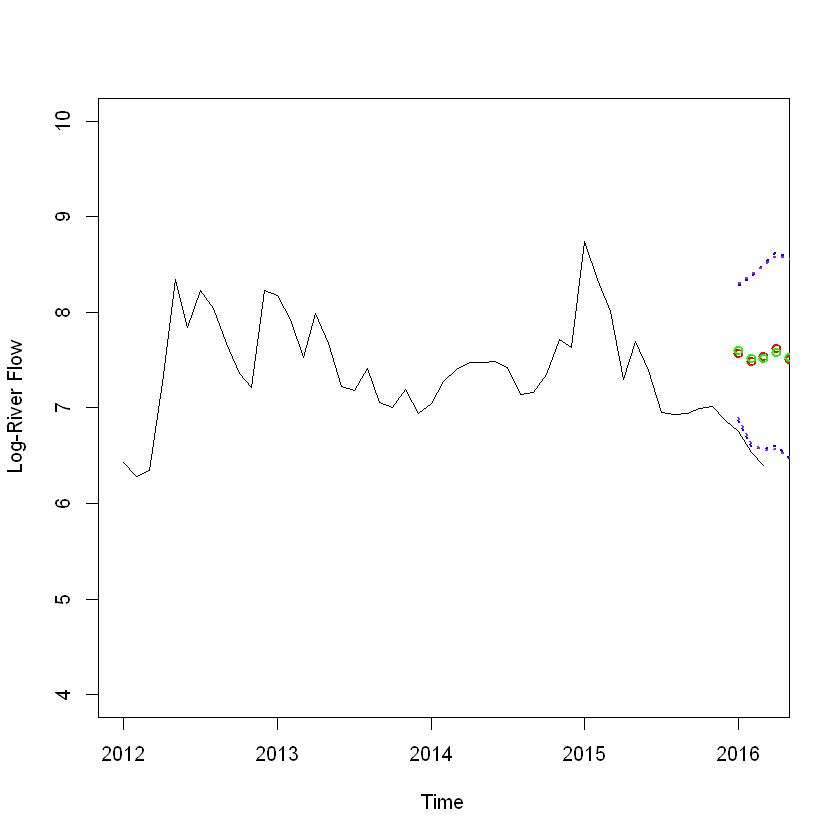

In [37]:
ymin=min(c(log(river[(n-50):n]),lo.pred,lo.pred.f))
ymax=max(c(log(river)[(n-50):n],up.pred,up.pred.f))
plot(ts(log(as.numeric(river[(n-50):n])),start=2012, freq=12), ylim=c(4,10), ylab="Log-River Flow", type="l",main="")
points(point.pred,lwd=2,col="red")
lines(lo.pred,lty=3,lwd= 2, col="blue")
lines(up.pred,lty=3,lwd= 2, col="blue")
points(point.pred.f,lwd=2,col="green")
lines(lo.pred.f,lty=3,lwd= 2, col="purple")
lines(up.pred.f,lty=3,lwd= 2, col="purple")

$ts_river
          fcst    lower    upper        CI
 [1,] 7.573512 6.866298 8.280725 0.7072135
 [2,] 7.486487 6.600476 8.372498 0.8860114
 [3,] 7.534787 6.563566 8.506008 0.9712209
 [4,] 7.620635 6.605161 8.636108 1.0154738
 [5,] 7.510547 6.471299 8.549796 1.0392484
 [6,] 7.430514 6.378287 8.482741 1.0522271
 [7,] 7.465430 6.406060 8.524800 1.0593702
 [8,] 7.563339 6.500020 8.626657 1.0633188
 [9,] 7.464614 6.399107 8.530121 1.0655066
[10,] 7.385948 6.319227 8.452668 1.0667204
[11,] 7.416936 6.349542 8.484331 1.0673942
[12,] 7.360910 6.293141 8.428678 1.0677685
[13,] 7.316823 6.248847 8.384800 1.0679764
[14,] 7.292209 6.224117 8.360301 1.0680919
[15,] 7.389492 6.321336 8.457648 1.0681561
[16,] 7.512243 6.444052 8.580435 1.0681918
[17,] 7.429742 6.361530 8.497954 1.0682116
[18,] 7.370287 6.302065 8.438510 1.0682226
[19,] 7.420547 6.352318 8.488775 1.0682287
[20,] 7.529894 6.461661 8.598126 1.0682321
[21,] 7.439695 6.371461 8.507929 1.0682340
[22,] 7.367385 6.299150 8.435620 1.0682351
[

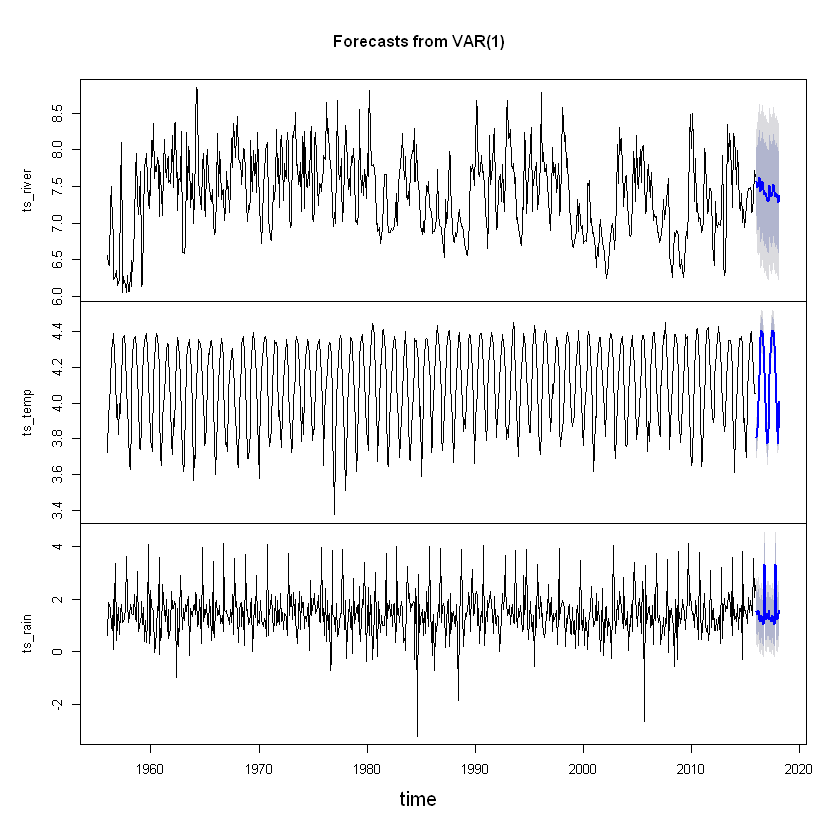

In [38]:
### Another approach for prediction & visualizing predictions
predict(model.var.restrict, n.ahead=27, ci=0.95)
fcst = forecast(model.var.restrict,h=27)
plot(fcst)

In [39]:
###VARX Model using temperature as exogenous variable##
data.train=cbind(ts_river,ts_rain)
data.test=cbind(ts_river2,ts_rain2)
##Model Selection
VARselect(data.train, lag.max = 20,season=12,type="both", exogen=data.frame(ts_temp))$selection
## Model Fitting: Unrestricted VAR
model.var2=VAR(data.train, p=1,season=12,type="both", exogen=data.frame(ts_temp))
summary(model.var2)


AIC(n)  HQ(n)  SC(n) FPE(n) 
     5      1      1      5


VAR Estimation Results:
Endogenous variables: ts_river, ts_rain 
Deterministic variables: both 
Sample size: 719 
Log Likelihood: -968.663 
Roots of the characteristic polynomial:
0.7378 0.02413
Call:
VAR(y = data.train, p = 1, type = "both", season = 12L, exogen = data.frame(ts_temp))


Estimation results for equation ts_river: 
ts_river = ts_river.l1 + ts_rain.l1 + const + trend + sd1 + sd2 + sd3 + sd4 + sd5 + sd6 + sd7 + sd8 + sd9 + sd10 + sd11 + ts_temp 

              Estimate Std. Error t value Pr(>|t|)    
ts_river.l1  7.371e-01  2.511e-02  29.352  < 2e-16 ***
ts_rain.l1   6.584e-02  2.122e-02   3.103  0.00199 ** 
const        2.588e+00  9.618e-01   2.691  0.00729 ** 
trend       -7.214e-05  6.714e-05  -1.074  0.28297    
sd1          1.090e-01  6.800e-02   1.603  0.10932    
sd2          1.110e-01  6.594e-02   1.684  0.09260 .  
sd3          2.191e-01  7.593e-02   2.885  0.00403 ** 
sd4          2.847e-01  9.763e-02   2.916  0.00366 ** 
sd5          2.324e-01  1.183e-01   1.96


VAR Estimation Results:
Endogenous variables: ts_river, ts_rain 
Deterministic variables: both 
Sample size: 719 
Log Likelihood: -978.54 
Roots of the characteristic polynomial:
0.7454     0
Call:
VAR(y = data.train, p = 1, type = "both", season = 12L, exogen = data.frame(ts_temp))


Estimation results for equation ts_river: 
ts_river = ts_river.l1 + ts_rain.l1 + const + sd3 + sd4 + sd7 + sd8 

            Estimate Std. Error t value Pr(>|t|)    
ts_river.l1  0.74544    0.02446  30.477  < 2e-16 ***
ts_rain.l1   0.03927    0.01576   2.491 0.012954 *  
const        1.82633    0.18199  10.035  < 2e-16 ***
sd3          0.11697    0.04953   2.362 0.018461 *  
sd4          0.16054    0.04944   3.247 0.001221 ** 
sd7          0.10026    0.04971   2.017 0.044094 *  
sd8          0.16353    0.04944   3.308 0.000988 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Residual standard error: 0.3608 on 712 degrees of freedom
Multiple R-Squared: 0.9977,	Adjusted R-squared: 0

$ts_river
          fcst    lower    upper        CI
 [1,] 7.573512 6.866298 8.280725 0.7072135
 [2,] 7.473588 6.587439 8.359738 0.8861498
 [3,] 7.520686 6.549248 8.492124 0.9714376
 [4,] 7.611687 6.595947 8.627426 1.0157395
 [5,] 7.512659 6.473117 8.552200 1.0395414
 [6,] 7.434136 6.381601 8.486671 1.0525349
 [7,] 7.473861 6.414175 8.533548 1.0596862
 [8,] 7.576077 6.512438 8.639716 1.0636393
 [9,] 7.473579 6.407749 8.539408 1.0658296
[10,] 7.395376 6.328332 8.462421 1.0670447
[11,] 7.419466 6.351746 8.487185 1.0677193
[12,] 7.354844 6.286750 8.422938 1.0680940
[13,] 7.307464 6.239162 8.375766 1.0683022
[14,] 7.274739 6.206321 8.343156 1.0684178
[15,] 7.373071 6.304589 8.441553 1.0684821
[16,] 7.500907 6.432389 8.569425 1.0685178
[17,] 7.427157 6.358619 8.495695 1.0685376
[18,] 7.373420 6.304871 8.441968 1.0685487
[19,] 7.426826 6.358271 8.495380 1.0685548
[20,] 7.540120 6.471561 8.608678 1.0685582
[21,] 7.446270 6.377710 8.514830 1.0685601
[22,] 7.374680 6.306119 8.443241 1.0685611
[

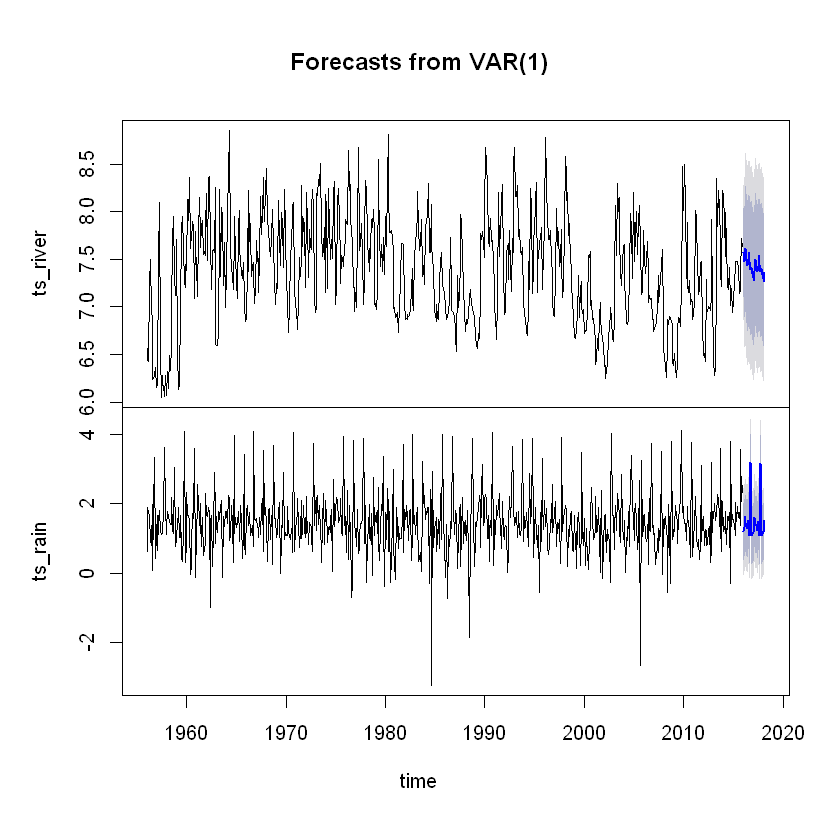

In [40]:
## Model Fitting: Restricted VAR
model.var.restrict2=restrict(model.var2)  
summary(model.var.restrict2)

n = length(ts_temp) - 27 
ts_temp1 = ts_temp[(n+1):length(ts_temp)];
x=data.frame(ts_temp1); colnames(x)="ts_temp"
predict(model.var.restrict2, n.ahead=27, ci=0.95,dumvar=x)
fcst = forecast(model.var.restrict2,h=27,dumvar=x)
plot(fcst)


In [41]:
##VARX Model using rain as exogenous variable##
##Model Selection
VARselect(cbind(ts_river,ts_temp), lag.max = 20,season=12,exogen=data.frame(ts_rain))$selection
## Model Fitting: Unrestricted VAR
model.var2=VAR(cbind(ts_river,ts_temp), p=3,season=12,exogen=data.frame(ts_rain))
summary(model.var2)

AIC(n)  HQ(n)  SC(n) FPE(n) 
     3      1      1      3


VAR Estimation Results:
Endogenous variables: ts_river, ts_temp 
Deterministic variables: const 
Sample size: 717 
Log Likelihood: 741.887 
Roots of the characteristic polynomial:
0.7906 0.5101 0.3541 0.3541 0.2207 0.2207
Call:
VAR(y = cbind(ts_river, ts_temp), p = 3, season = 12L, exogen = data.frame(ts_rain))


Estimation results for equation ts_river: 
ts_river = ts_river.l1 + ts_temp.l1 + ts_river.l2 + ts_temp.l2 + ts_river.l3 + ts_temp.l3 + const + sd1 + sd2 + sd3 + sd4 + sd5 + sd6 + sd7 + sd8 + sd9 + sd10 + sd11 + ts_rain 

             Estimate Std. Error t value Pr(>|t|)    
ts_river.l1  0.755791   0.037558  20.123  < 2e-16 ***
ts_temp.l1  -0.092325   0.229797  -0.402 0.687979    
ts_river.l2 -0.079302   0.047166  -1.681 0.093143 .  
ts_temp.l2  -0.318836   0.234881  -1.357 0.175082    
ts_river.l3  0.065718   0.037509   1.752 0.080199 .  
ts_temp.l3  -0.401694   0.230458  -1.743 0.081770 .  
const        5.171634   1.382788   3.740 0.000199 ***
sd1         -0.005603   0.08434


VAR Estimation Results:
Endogenous variables: ts_river, ts_temp 
Deterministic variables: const 
Sample size: 717 
Log Likelihood: 734.54 
Roots of the characteristic polynomial:
0.753 0.5426 0.4066 0.4066     0     0
Call:
VAR(y = cbind(ts_river, ts_temp), p = 3, season = 12L, exogen = data.frame(ts_rain))


Estimation results for equation ts_river: 
ts_river = ts_river.l1 + ts_temp.l3 + const + sd7 + sd8 + sd9 + sd11 + ts_rain 

            Estimate Std. Error t value Pr(>|t|)    
ts_river.l1  0.73332    0.02452  29.906  < 2e-16 ***
ts_temp.l3  -0.41319    0.07658  -5.395 9.34e-08 ***
const        3.59706    0.36540   9.844  < 2e-16 ***
sd7          0.10465    0.05013   2.087  0.03721 *  
sd8          0.24163    0.05366   4.503 7.83e-06 ***
sd9          0.12736    0.05765   2.209  0.02747 *  
sd11         0.12581    0.05738   2.192  0.02867 *  
ts_rain      0.04931    0.01713   2.879  0.00411 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Residual standard 

$ts_river
          fcst    lower    upper        CI
 [1,] 7.605261 6.902009 8.308512 0.7032516
 [2,] 7.479433 6.607357 8.351509 0.8720759
 [3,] 7.458304 6.507760 8.408848 0.9505442
 [4,] 7.506876 6.515150 8.498602 0.9917256
 [5,] 7.527070 6.512778 8.541363 1.0142924
 [6,] 7.467959 6.441225 8.494692 1.0267332
 [7,] 7.505251 6.471482 8.539021 1.0337695
 [8,] 7.576738 6.538978 8.614498 1.0377601
 [9,] 7.516512 6.476495 8.556529 1.0400168
[10,] 7.327197 6.285899 8.368494 1.0412976
[11,] 7.327465 6.285440 8.369490 1.0420250
[12,] 7.133985 6.091547 8.176423 1.0424376
[13,] 7.250311 6.207639 8.292982 1.0426717
[14,] 7.288773 6.245969 8.331578 1.0428046
[15,] 7.397576 6.354696 8.440456 1.0428799
[16,] 7.501085 6.458162 8.544008 1.0429227
[17,] 7.538520 6.495573 8.581466 1.0429469
[18,] 7.484789 6.441829 8.527750 1.0429607
[19,] 7.537371 6.494402 8.580339 1.0429685
[20,] 7.635978 6.593005 8.678951 1.0429729
[21,] 7.576693 6.533718 8.619668 1.0429754
[22,] 7.377563 6.334586 8.420540 1.0429768
[

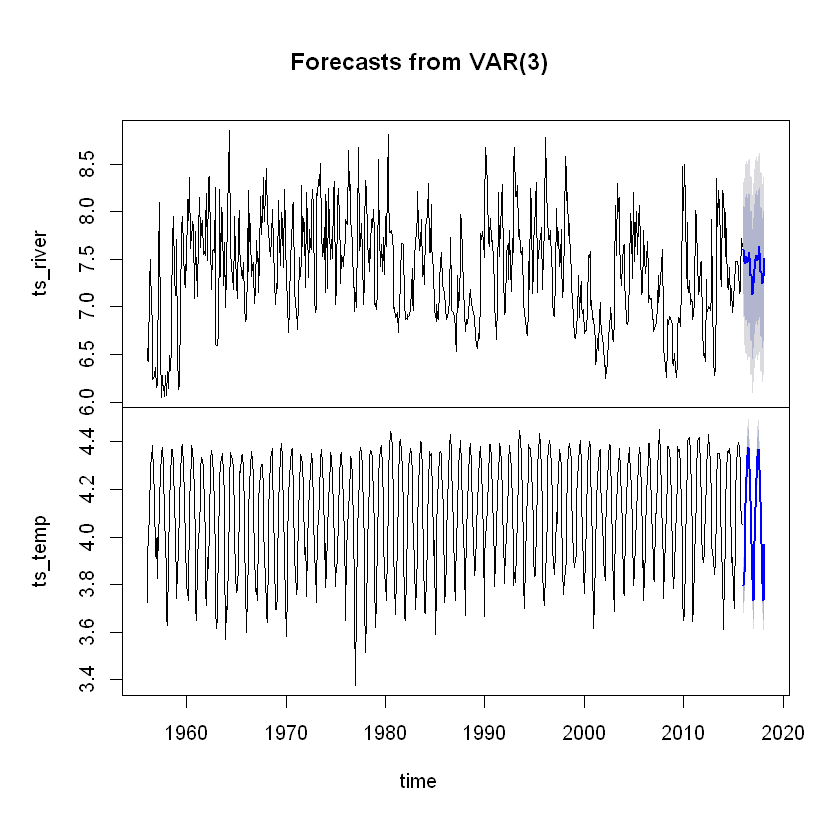

In [42]:
## Model Fitting: Restricted VAR
model.var.restrict2=restrict(model.var2)  
summary(model.var.restrict2)

x=data.frame(ts_rain[(n+1):length(ts_rain)]); colnames(x)="ts_rain"
predict(model.var.restrict2, n.ahead=27, ci=0.95,dumvar=x)
fcst = forecast(model.var.restrict2,h=27,dumvar=x)
plot(fcst)
